🟦 1. Title & Introduction

# 📊 KPI Analysis — Nordtech ETL Project

This notebook analyzes the cleaned dataset produced by the ETL pipeline.
The goal is to compute key performance indicators (KPIs) related to:

- Sales performance  
- Customer behavior  
- Product performance  
- Delivery efficiency  
- Reviews and ratings  
- Sentiment analysis  

All KPIs are based on the cleaned dataset saved by the ETL pipeline.

🟦 2. Imports & Load Data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv(
    "../data/processed/nordtech_cleaned.csv",
    parse_dates=["orderdatum", "leveransdatum", "recensionsdatum"]
)

df.head()

,order_id,orderrad_id,orderdatum,leveransdatum,produkt_sku,produktnamn,kategori,antal,pris_per_enhet,region,kundtyp,betalmetod,kund_id,leveransstatus,recension_text,recensionsdatum,betyg,sentiment_category
0,ORD-2024-00001,ORD-2024-00001-1,2024-05-19,2024-05-22,SKU-WC001,Webbkamera HD,Tillbehör,1,799.0,uppsala,private,card,KND-53648,delivered,NaN,NaT,4.0,neutral
1,ORD-2024-00002,ORD-2024-00002-1,2024-12-02,NaT,SKU-HB001,USB-C Hub 7-port,Tillbehör,1,549.0,göteborg,private,swish,KND-84095,delivered,NaN,NaT,4.0,neutral
2,ORD-2024-00003,ORD-2024-00003-1,2024-12-31,2025-01-03,SKU-SD001,Extern SSD 1TB,Lagring,1,1199.0,NaN,business,invoice,KND-91748,delivered,Stämmer inte överens med produktbeskrivningen.,2025-12-01,2.0,negative
3,ORD-2024-00003,ORD-2024-00003-2,2024-12-31,2025-01-03,SKU-SD002,Extern SSD 500GB,Lagring,10,699.0,stockholm,business,invoice,KND-91748,received,"Leveransen tog lite längre än utlovat, men pro...",NaT,3.0,neutral
4,ORD-2024-00003,ORD-2024-00003-3,2024-12-31,2025-01-03,SKU-MS001,Trådlös Mus X1,Tillbehör,1,399.0,stockholm,business,invoice,KND-91748,unknown,NaN,NaT,4.0,neutral


🟦 3. Dataset Overview

    We begin by inspecting the structure and basic statistics of the cleaned dataset.

3.1 Info & Describe

In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            2700 non-null   object        
 1   orderrad_id         2700 non-null   object        
 2   orderdatum          2563 non-null   datetime64[ns]
 3   leveransdatum       2558 non-null   datetime64[ns]
 4   produkt_sku         2700 non-null   object        
 5   produktnamn         2700 non-null   object        
 6   kategori            2700 non-null   object        
 7   antal               2700 non-null   int64         
 8   pris_per_enhet      2700 non-null   float64       
 9   region              2550 non-null   object        
 10  kundtyp             2700 non-null   object        
 11  betalmetod          2700 non-null   object        
 12  kund_id             2700 non-null   object        
 13  leveransstatus      2700 non-null   object      

,orderdatum,leveransdatum,antal,pris_per_enhet,recensionsdatum,betyg
count,2563,2558,2700.000000,2700.000000,504,2700.000000
mean,2024-07-06 18:07:43.519313408,2024-07-10 05:24:15.199374336,1.590370,3510.277778,2024-07-21 21:00:00.000000256,3.836296
min,2023-12-27 00:00:00,2024-01-01 00:00:00,1.000000,399.000000,2024-01-02 00:00:00,1.000000
25%,2024-03-29 00:00:00,2024-04-02 00:00:00,1.000000,599.000000,2024-04-08 00:00:00,4.000000
50%,2024-07-03 00:00:00,2024-07-08 00:00:00,1.000000,899.000000,2024-07-11 00:00:00,4.000000
75%,2024-10-20 00:00:00,2024-10-25 00:00:00,2.000000,4999.000000,2024-11-01 00:00:00,4.000000
max,2024-12-31 00:00:00,2025-01-07 00:00:00,10.000000,18999.000000,2025-12-01 00:00:00,5.000000
std,NaN,NaN,1.389228,5155.248878,NaN,0.894105


⭐ 4. Sales Performance KPIs

🟦 4.1 Total Revenue

In [10]:
df["total_price"] = df["antal"] * df["pris_per_enhet"]
total_revenue = df["total_price"].sum()
total_revenue

15122656.0

🟦 4.2 Revenue by Month

In [11]:
df["month"] = df["orderdatum"].dt.to_period("M")
rev_by_month = df.groupby("month")["total_price"].sum()
rev_by_month

month
2023-12       1299.0
2024-01    1431050.0
2024-02    1260333.0
2024-03    1095082.0
2024-04    1319651.0
2024-05    1026091.0
2024-06     962909.0
2024-07     809914.0
2024-08     850419.0
2024-09    1002157.0
2024-10    1565834.0
2024-11    1705884.0
2024-12    1412951.0
Freq: M, Name: total_price, dtype: float64

🟦 4.3 Revenue by Weekday

In [12]:
df["weekday"] = df["orderdatum"].dt.day_name()
revenue_by_weekday = (
    df.groupby("weekday")["total_price"]
    .sum()
    .sort_values(ascending=False)
)

revenue_by_weekday

weekday
Saturday     2692885.0
Friday       2173301.0
Tuesday      2109610.0
Sunday       2032342.0
Monday       1968731.0
Thursday     1946804.0
Wednesday    1519901.0
Name: total_price, dtype: float64

🟦 4.4 Revenue by Category

In [13]:
rev_by_category = df.groupby("kategori")["total_price"].sum().sort_values(ascending=False)
rev_by_category

kategori
Datorer        9761293.0
Bildskärmar    2945341.0
Tillbehör      1270342.0
Lagring         603661.0
Ljud            542019.0
Name: total_price, dtype: float64

🟦 4.5 Revenue by Region

In [14]:
rev_by_region = df.groupby("region")["total_price"].sum().sort_values(ascending=False)
rev_by_region

region
stockholm    5095230.0
göteborg     3944937.0
malmö        1343131.0
uppsala      1313772.0
örebro        758028.0
norrland      608841.0
linköping     582556.0
västerås      474358.0
Name: total_price, dtype: float64

In [15]:
rev_by_region_pct = (rev_by_region / rev_by_region.sum()) * 100

pd.DataFrame({
    "Revenue_SEK": rev_by_region,
    "Revenue_%": rev_by_region_pct.round(2)
})

,Revenue_SEK,Revenue_%
region,,
stockholm,5095230.0,36.08
göteborg,3944937.0,27.94
malmö,1343131.0,9.51
uppsala,1313772.0,9.30
örebro,758028.0,5.37
norrland,608841.0,4.31
linköping,582556.0,4.13
västerås,474358.0,3.36


⭐ 5. Customer Behavior KPIs

🟦 5.1 Orders per Customer

In [16]:
orders_per_customer = df.groupby("kund_id")["order_id"].nunique()
orders_per_customer.describe()

count    1644.000000
mean        1.007908
std         0.088599
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: order_id, dtype: float64

🟦 5.2 Revenue by Customer Type

In [17]:
rev_by_kundtyp = df.groupby("kundtyp")["total_price"].sum()
rev_by_kundtyp

kundtyp
business    8203858.0
private     6918798.0
Name: total_price, dtype: float64

🟦 5.3 Customer Lifetime Value (CLV)

In [18]:
clv = df.groupby("kund_id")["total_price"].sum().sort_values(ascending=False)
clv.head(10)

kund_id
KND-76077    264183.0
KND-73241    217983.0
KND-58892    201988.0
KND-19497    166186.0
KND-65111    140482.0
KND-82519    117991.0
KND-85319    108480.0
KND-21732    105888.0
KND-60447    102391.0
KND-62998    102285.0
Name: total_price, dtype: float64

⭐ 6. Product Performance KPIs

🟦 6.1 Best‑Selling Products

In [19]:
best_sellers = df.groupby("produktnamn")["antal"].sum().sort_values(ascending=False)
best_sellers.head(10)

produktnamn
Ergonomisk Mus Pro          347
Webbkamera HD               335
Trådlös Mus X1              329
Extern SSD 500GB            325
Extern SSD 1TB              314
USB-C Hub 7-port            303
Laptop Budget 14            257
Kompakt Tangentbord Mini    256
Laptop Gaming X             239
Mekaniskt Tangentbord K7    238
Name: antal, dtype: int64

🟦 6.2 Highest Revenue Products

In [20]:
top_revenue_products = df.groupby("produktnamn")["total_price"].sum().sort_values(ascending=False)
top_revenue_products.head(10)

produktnamn
Laptop Gaming X             4540761.0
Laptop Pro 15               3164789.0
Laptop Budget 14            2055743.0
Bildskärm 32" Curved        1355774.0
Bildskärm 27" UHD           1014797.0
Bildskärm 24" FHD            574770.0
Extern SSD 1TB               376486.0
Headset Pro ANC              315234.0
Mekaniskt Tangentbord K7     309162.0
Webbkamera HD                267665.0
Name: total_price, dtype: float64

⭐ 7. Delivery Efficiency KPIs

🟦 7.1 Delivery Time (Days)

In [21]:
df["delivery_days"] = (df["leveransdatum"] - df["orderdatum"]).dt.days
df["delivery_days"].describe()

count    2430.000000
mean        2.958025
std         1.044052
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         7.000000
Name: delivery_days, dtype: float64

🟦 7.2 Delivery Status Distribution

In [22]:
df["leveransstatus"].value_counts()

leveransstatus
delivered     2101
in_transit     165
returned       158
sent            94
unknown         92
received        90
Name: count, dtype: int64

⭐ 8. Reviews & Ratings KPIs

🟦 8.1 Average Rating

In [23]:
df["betyg"].mean()

3.8362962962962963

🟦 8.2 Rating by Category

In [24]:
rating_by_category = df.groupby("kategori")["betyg"].mean().sort_values(ascending=False)
rating_by_category

kategori
Tillbehör      3.955556
Ljud           3.789298
Datorer        3.782609
Bildskärmar    3.723301
Lagring        3.691099
Name: betyg, dtype: float64

🟦 8.3 Review Count by Category

In [25]:
df["has_review"] = df["recension_text"].notna()
df.groupby("kategori")["has_review"].sum().sort_values(ascending=False)

kategori
Tillbehör      566
Datorer        217
Lagring        202
Bildskärmar    193
Ljud           139
Name: has_review, dtype: int64

🟦 8.4 Sentiment Distribution (BERT)

In [26]:
sentiment_counts = df["sentiment_category"].value_counts()
sentiment_counts

sentiment_category
neutral     1638
positive     839
negative     223
Name: count, dtype: int64

⭐ 9. Visualizations

🟦 9.1 Revenue by Month (Line Chart)

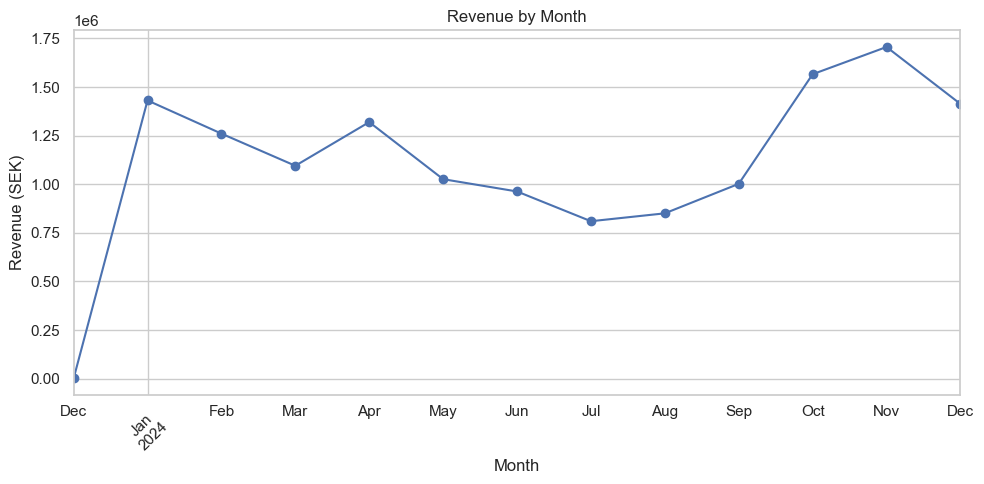

In [27]:
plt.figure(figsize=(10, 5))
rev_by_month.sort_index().plot(kind="line", marker="o")
plt.title("Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Revenue (SEK)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

🟦 9.2 Revenue by Category (Bar Chart)

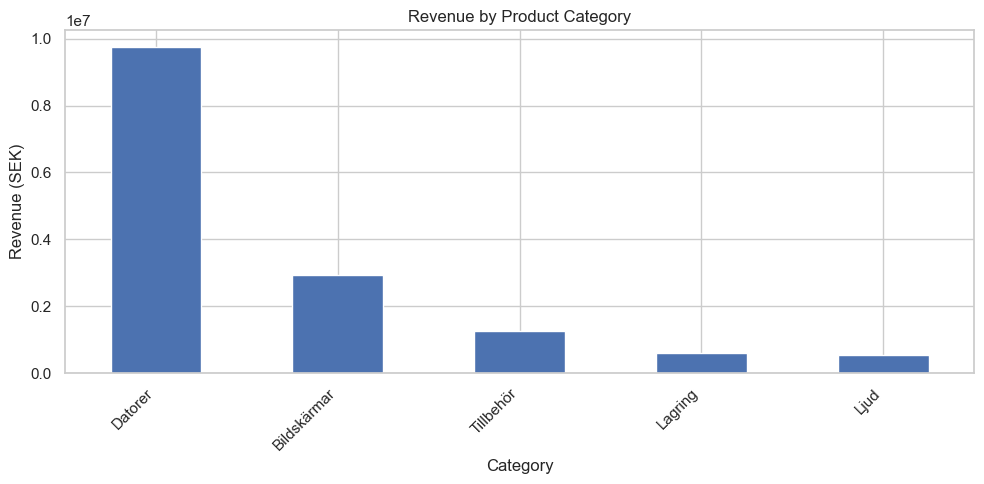

In [21]:
plt.figure(figsize=(10, 5))
rev_by_category.plot(kind="bar")
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Revenue (SEK)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

🟦 9.3 Revenue by Region (Bar Chart)

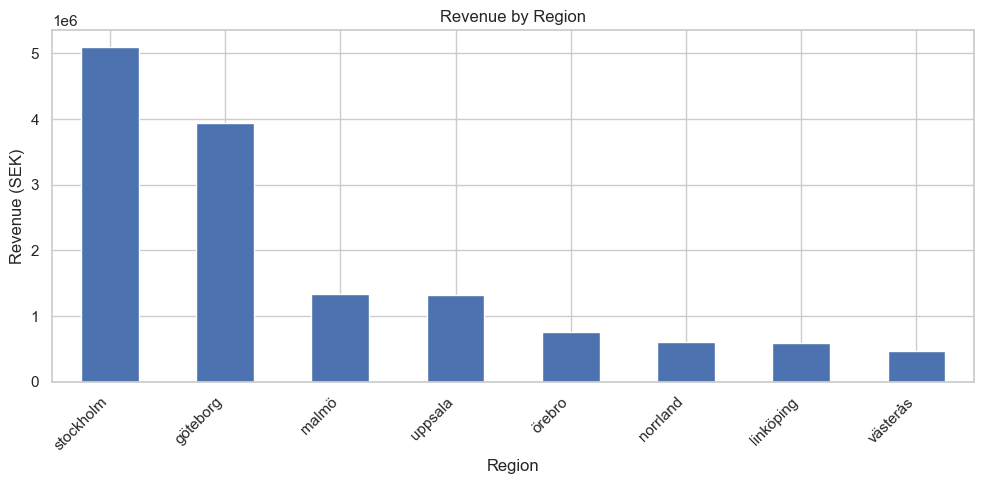

In [22]:
plt.figure(figsize=(10, 5))
rev_by_region.plot(kind="bar")
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue (SEK)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

🟦 9.4 Delivery Time Distribution (Histogram)

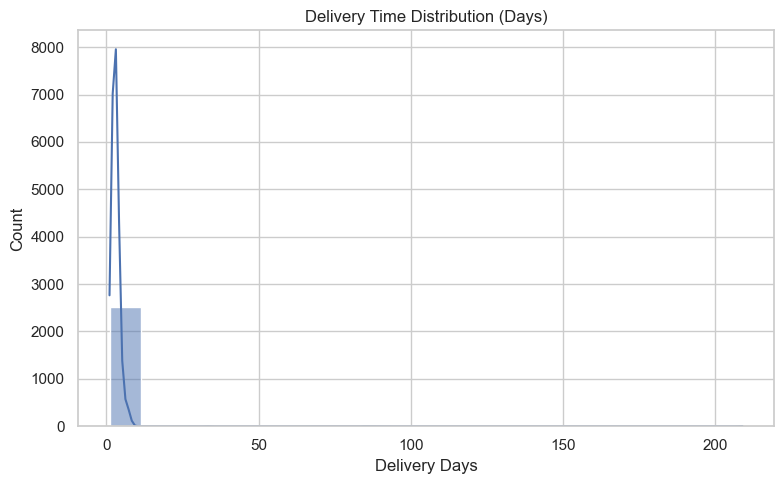

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df["delivery_days"].dropna(), bins=20, kde=True)
plt.title("Delivery Time Distribution (Days)")
plt.xlabel("Delivery Days")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

🟦 9.5 Rating Distribution (Histogram)

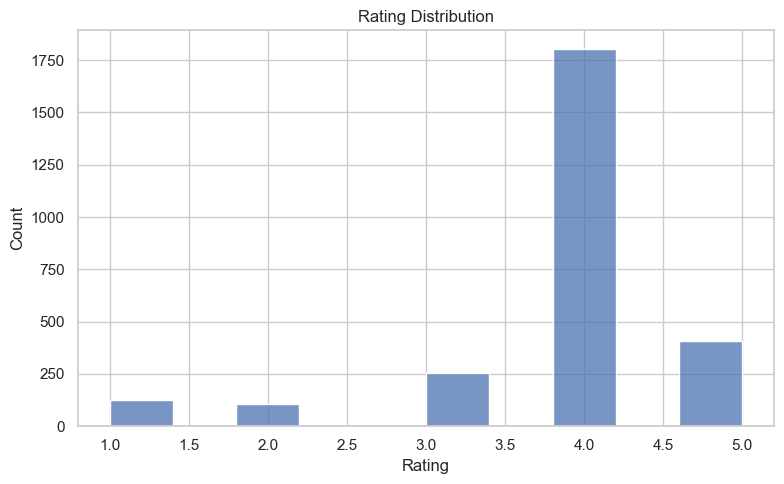

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(df["betyg"].dropna(), bins=10)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

🟦 9.6 Average Rating by Category (Bar Chart)

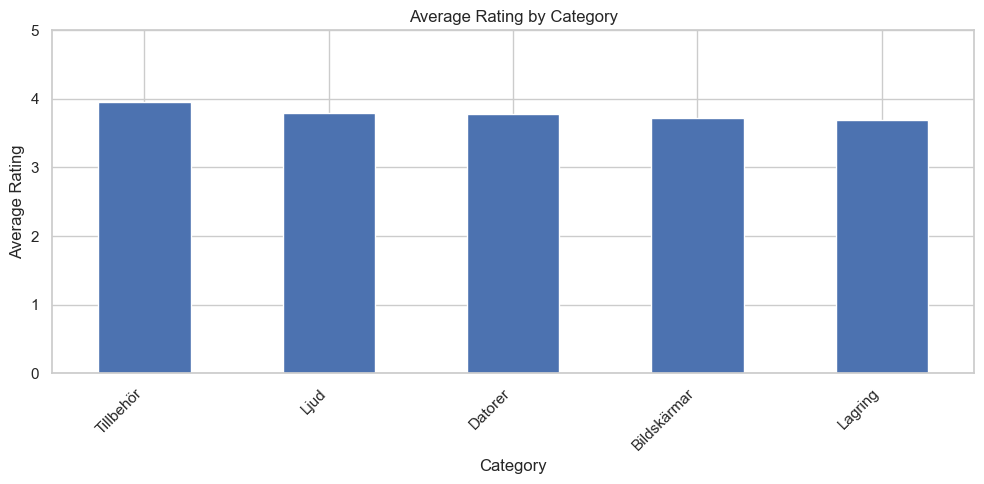

In [25]:
plt.figure(figsize=(10, 5))
rating_by_category.plot(kind="bar")
plt.title("Average Rating by Category")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

🟦 9.7 Sentiment Distribution (Bar Chart)

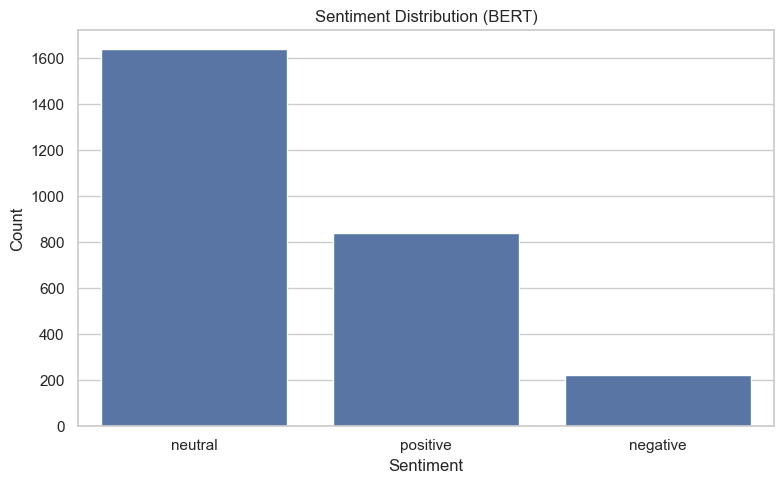

In [28]:
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Sentiment Distribution (BERT)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

⭐ 10. Summary

# 🎉 KPI Analysis Completed

This notebook computed and visualized key performance indicators across:

- Sales performance  
- Customer behavior  
- Product performance  
- Delivery efficiency  
- Reviews and ratings  
- Sentiment analysis  

These KPIs and visualizations form the basis for business insights and the final report.